In [1]:
import tensorflow as tf
import keras
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [22]:
model = keras.models.load_model('ASL.h5')

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_3 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [31]:
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()
    # cv.rectangle(frame,(0, 0), (200, 200), (255, 0, 0))

    hand = cv.cvtColor(frame[0:200, 0:200], cv.COLOR_BGR2RGB)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# plt.imshow(hand)

cap.release()
cv.destroyAllWindows()

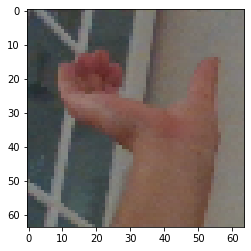

In [32]:
hand_small = cv.resize(hand, (64, 64))
plt.imshow(hand_small)
hand_small = np.expand_dims(hand_small, axis=0)

In [33]:
p = model.predict(hand_small).argmax()
letter = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'[p]
print(letter)

M
